In [1]:
import numpy as np
from keras.datasets import imdb
from tqdm.notebook import tqdm

from keras import models
from keras import layers

import seaborn as sns

# IMDB

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [3]:
def vectorize_sequences(sequances, dimension = 10000):
    result = np.zeros((len(sequances), dimension))
    for i, sequance in tqdm(enumerate(sequances)):
        result[i, sequance] = 1
    return result

In [4]:
%%time
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)


Wall time: 3.65 s


In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation = 'relu', input_shape = (X_train.shape[1],)))
model1.add(layers.Dense(16, activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))

In [7]:
model1.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [8]:
partial_X_train = X_train[10000:]
X_val = X_train[:10000]

partial_y_train = y_train[10000:]
y_val = y_train[:10000]

In [9]:
%%time
history1 = model1.fit(partial_X_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (X_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 149ms/step - loss: 0.5849 - accuracy: 0.7086 - val_loss: 0.4034 - val_accuracy: 0.8503
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3207 - accuracy: 0.9028 - val_loss: 0.3491 - val_accuracy: 0.8602
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2298 - accuracy: 0.9296 - val_loss: 0.2808 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1772 - accuracy: 0.9459 - val_loss: 0.2788 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1436 - accuracy: 0.9582 - val_loss: 0.2810 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1190 - accuracy: 0.9646 - val_loss: 0.3004 - val_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0953 - accuracy: 0.9749 - val_loss: 0.3116 - val_accuracy: 0.8835
Epoch 8/20
3

In [10]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

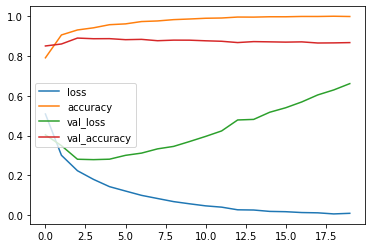

In [11]:
ax = sns.lineplot(range(len(history1.history['loss'])), history1.history['loss'])
sns.lineplot(range(len(history1.history['accuracy'])), history1.history['accuracy'], ax = ax)
sns.lineplot(range(len(history1.history['val_loss'])), history1.history['val_loss'], ax = ax)
sns.lineplot(range(len(history1.history['val_accuracy'])), history1.history['val_accuracy'], ax = ax)
ax.legend(history1.history.keys());

In [12]:
%%time
model2 = models.Sequential()

model2.add(layers.Dense(50, activation = 'relu', input_shape = (X_train.shape[1],)))
model2.add(layers.Dense(50, activation = 'relu'))
model2.add(layers.Dense(50, activation = 'relu'))
model2.add(layers.Dense(50, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

model2.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history2 = model2.fit(partial_X_train,
                     partial_y_train,
                     epochs = 20,
                     batch_size = 512,
                     validation_data = (X_val, y_val))

Epoch 1/20
30/30 [==============================] - 9s 267ms/step - loss: 0.5983 - accuracy: 0.6614 - val_loss: 0.4010 - val_accuracy: 0.8281
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2862 - accuracy: 0.8960 - val_loss: 0.2841 - val_accuracy: 0.8881
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1862 - accuracy: 0.9317 - val_loss: 0.2997 - val_accuracy: 0.8793
Epoch 4/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1390 - accuracy: 0.9503 - val_loss: 0.3193 - val_accuracy: 0.8782
Epoch 5/20
30/30 [==============================] - 2s 65ms/step - loss: 0.0946 - accuracy: 0.9683 - val_loss: 0.3952 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0708 - accuracy: 0.9766 - val_loss: 0.4011 - val_accuracy: 0.8772
Epoch 7/20
30/30 [==============================] - 2s 65ms/step - loss: 0.0392 - accuracy: 0.9897 - val_loss: 0.4334 - val_accuracy: 0.8794
Epoch 8/20
3

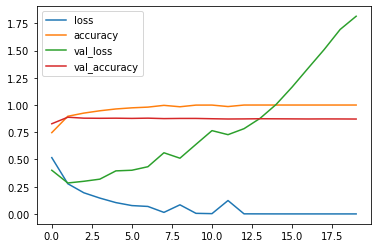

In [13]:
ax = sns.lineplot(range(len(history2.history['loss'])), history2.history['loss'])
sns.lineplot(range(len(history2.history['accuracy'])), history2.history['accuracy'], ax = ax)
sns.lineplot(range(len(history2.history['val_loss'])), history2.history['val_loss'], ax = ax)
sns.lineplot(range(len(history2.history['val_accuracy'])), history2.history['val_accuracy'], ax = ax)
ax.legend(history2.history.keys());

In [16]:
print(f'model1 - {model1.evaluate(X_test, y_test)}')
print(f'midel2 - {model2.evaluate(X_test, y_test)}')

782/782 [==============================] - 2s 3ms/step - loss: 0.7210 - accuracy: 0.8516
model1 - [0.7210388779640198, 0.851639986038208]
782/782 [==============================] - 3s 3ms/step - loss: 2.0218 - accuracy: 0.8560
midel2 - [2.0217862129211426, 0.8559600114822388]
